# Plot Compound Years for CESM

This file grabs the warm season indeces and sees if this shows us anything


You need to run cesmIndeces.ipnyb first

In [2]:
#For plots of a single experiment to demonstrate things, plot this one:

expToPlot = 'LME.002'

In [3]:
#import my functions
import sys
sys.path.append('../')

#import my functions
import utils._modelDefinitions as _model
import utils._indexDefinitions as _index
from utils.timePeriod import averageForTimePeriod

%run "utils/compound.ipynb"

In [32]:
import xarray
import matplotlib.pyplot as plt
import numpy
import pandas
import scipy.stats

%matplotlib inline

In [5]:
firePos=xarray.open_dataset('results/cesmFirePos.nc')

fireNeg=xarray.open_dataset('results/cesmFireNeg.nc')

# In non-overlapping 30 year bins

Calculate non-overlapping 30 year bins, and sum the number of events in them

In [6]:
yearBins=numpy.arange(860, 2100, 30)

binMid=numpy.arange(875, 2086, 30)

binnedFirePos=firePos.groupby_bins('year', yearBins, labels=binMid ).sum() 

binnedFirePos= binnedFirePos.rename({'year_bins':'year'})


Plot the mean in each bin for the full forcing ensemble and the rcp85 extensions

In [7]:
pairs=firePos.attrs['pairs']
toPlot=[*pairs,'all3']
colors=['orange', 'purple', 'green','blue']

def binPlot(da, expSet):

    plt.figure(figsize=(18,6))

    for counter in [0,1,2,3]:
        plt.vlines(
            x=da.year-3+1.5*counter, 
            ymin=0,
            ymax=da[toPlot[counter]].sel(experiment=expSet).mean(dim='experiment'),
            label=toPlot[counter],
            color=colors[counter]
        )

    plt.legend(loc='upper left')
    plt.xticks(ticks=da.year)
    plt.xlim(1700,2100)
    plt.xlabel('Mid-point of 30 year bin')
    plt.ylim(0,8)
    plt.ylabel('Number of events (mean)')
    plt.title('Pairs and all-three for runs with ' + str(expSet) + ', in non-overlaping 30 year bins')
    plt.minorticks_on()

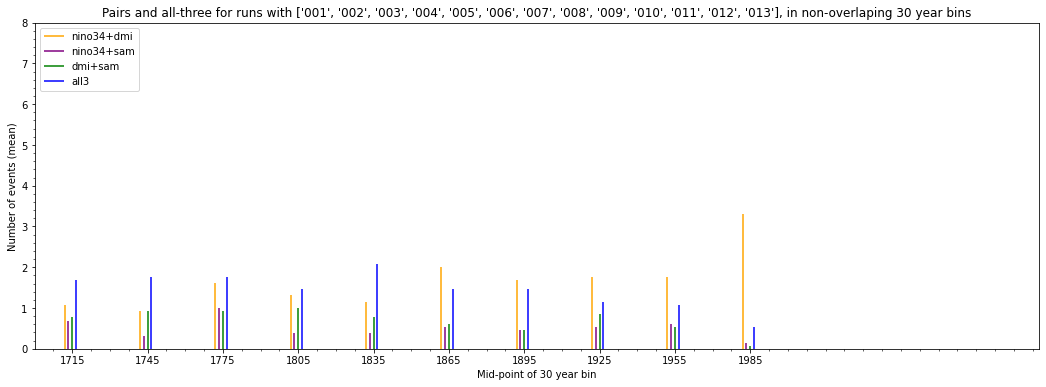

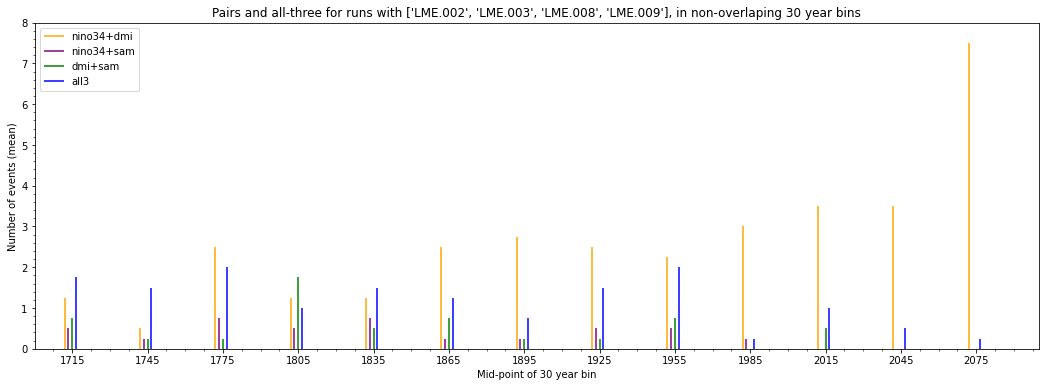

In [8]:
binPlot(binnedFirePos.where(binnedFirePos.year<=1985, drop=True), _model.cesmFullForcings)

binPlot(binnedFirePos, _model.cesmRcp85)

Group into three time periods: pre 1850, 1850-2005 and 2005 to 2100

In [15]:
groupA = binnedFirePos.sel(experiment=_model.cesmRcp85, year=slice(850,1850))
groupB = binnedFirePos.sel(experiment=_model.cesmRcp85, year=slice(1850,2006))
groupC = binnedFirePos.sel(experiment=_model.cesmRcp85, year=slice(2006,2100))

In [30]:
groupA.nino34.values.flatten()

array([5., 3., 2., 4., 2., 6., 3., 4., 5., 5., 5., 3., 4., 4., 6., 4., 6.,
       6., 5., 6., 2., 5., 3., 4., 3., 4., 4., 4., 4., 4., 6., 2., 3., 3.,
       3., 4., 2., 5., 6., 4., 6., 7., 6., 5., 4., 5., 3., 4., 5., 4., 3.,
       5., 5., 2., 8., 4., 4., 2., 2., 5., 3., 3., 4., 3., 3., 4., 3., 6.,
       6., 5., 3., 5., 4., 6., 7., 5., 4., 3., 6., 2., 4., 5., 5., 6., 5.,
       6., 5., 4., 7., 4., 3., 4., 2., 3., 4., 4., 7., 4., 5., 6., 4., 4.,
       4., 5., 5., 4., 4., 4., 4., 5., 3., 3., 4., 2., 4., 6., 2., 3., 3.,
       2., 5., 5., 6., 6., 3., 3., 5., 1., 4., 3., 4., 3.])

In [37]:
scipy.stats.f_oneway(
    groupA.nino34.values.flatten() , 
    groupB.nino34.values.flatten(), 
    groupC.nino34.values.flatten()
)

F_onewayResult(statistic=16.968163336313857, pvalue=2.056432151543127e-07)

In [38]:
scipy.stats.ttest_ind(groupA.nino34.values.flatten() , 
    groupB.nino34.values.flatten())

Ttest_indResult(statistic=-1.2636691062845116, pvalue=0.20830921334370645)

In [39]:
scipy.stats.ttest_ind(groupB.nino34.values.flatten() , 
    groupC.nino34.values.flatten())

Ttest_indResult(statistic=-3.3532297514471994, pvalue=0.0021748755116565983)

In [65]:
def mySlowFunction(input):
    y=input[0]
    if y<1850:
        result='A'
    elif y<2006:
        result='B'
    else:
        result='C'
        
    return result

<AxesSubplot:title={'center':'nino34'}, xlabel='[<function mySlowFunction at 0x7f94b0dcc040>]'>

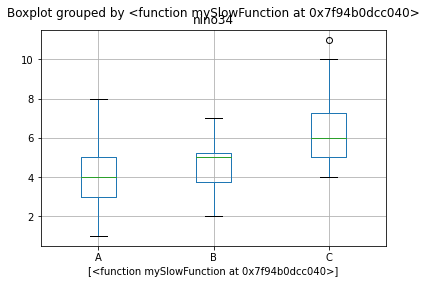

In [68]:
binnedFirePos.sel(experiment=_model.cesmRcp85).nino34.to_dataframe().boxplot(by=mySlowFunction)


In [18]:
groupA.nino34

<xarray.DataArray 'nino34' (year: 33, experiment: 4)>
array([[5., 3., 2., 4.],
       [2., 6., 3., 4.],
       [5., 5., 5., 3.],
       [4., 4., 6., 4.],
       [6., 6., 5., 6.],
       [2., 5., 3., 4.],
       [3., 4., 4., 4.],
       [4., 4., 6., 2.],
       [3., 3., 3., 4.],
       [2., 5., 6., 4.],
       [6., 7., 6., 5.],
       [4., 5., 3., 4.],
       [5., 4., 3., 5.],
       [5., 2., 8., 4.],
       [4., 2., 2., 5.],
       [3., 3., 4., 3.],
       [3., 4., 3., 6.],
       [6., 5., 3., 5.],
       [4., 6., 7., 5.],
       [4., 3., 6., 2.],
       [4., 5., 5., 6.],
       [5., 6., 5., 4.],
       [7., 4., 3., 4.],
       [2., 3., 4., 4.],
       [7., 4., 5., 6.],
       [4., 4., 4., 5.],
       [5., 4., 4., 4.],
       [4., 5., 3., 3.],
       [4., 2., 4., 6.],
       [2., 3., 3., 2.],
       [5., 5., 6., 6.],
       [3., 3., 5., 1.],
       [4., 3., 4., 3.]])
Coordinates:
  * year        (year) int64 875 905 935 965 995 ... 1715 1745 1775 1805 1835
  * experiment  (experiment) object 'LME.002' 'LME.003' 'LME.008' 'LME.009'

# In overlapping 30 year bins

In [ ]:
overBinFirePos = overlappingBinSum(firePos)

binPlot(overBinFirePos.where(overBinFirePos.year<=1985, drop=True), _model.cesmFullForcings)

binPlot(overBinFirePos, _model.cesmRcp85)